In [40]:
#PARAMS
annee = 1994

In [44]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as sf
import multidict as multidict

spark = SparkSession\
            .builder\
            .master("local[*]")\
            .appName("Count")\
            .getOrCreate()

lines = spark.read\
             .option("header",True)\
             .option("delimiter", ";")\
             .csv("dpt2018.csv")

def getDict(sexe) :
    data = lines.filter(sf.col("annais") == annee).filter(sf.col("sexe") == sexe).filter(sf.col("preusuel") != "_PRENOMS_RARES").groupBy("preusuel").agg(sf.sum("nombre").alias("nb")).orderBy(sf.desc("nb"))
    data_dict = data.toPandas().set_index('preusuel').T.to_dict()
    dataDict = multidict.MultiDict()
    for key, value in data_dict.items():
        nb = 0
        for k,v in value.items():
            nb = v
        dataDict.add(key, nb)
    return dataDict

girlDict = getDict(2)
boyDict = getDict(1)

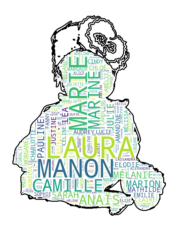

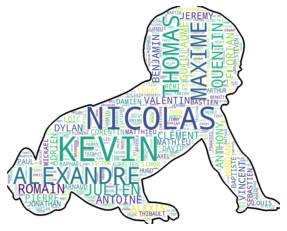

In [48]:
#WordCount
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plotWordCloud(image,dataDict):
 
    #mask
    mask = np.array(Image.open(image))

    # Create the wordcloud object
    wordcloud = WordCloud(background_color="white", max_words=1000, mask=mask, contour_width=3, contour_color='black').generate_from_frequencies(dataDict)
 
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

#Girl
plotWordCloud("girl.png",girlDict)
#Boy
plotWordCloud("baby.png",boyDict)
